In [56]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [63]:
# 
audio_path = "Rihanna-stay.mp3"
y , sr = librosa.load(audio_path, sr = None)
print(y, sr)

[0. 0. 0. ... 0. 0. 0.] 48000


sr is the sampling rate -> cuantas muestras se muestran en 1 s


In [64]:
#cortaré el audio para que el proceso no se haga tan largo
start_time = 30 #seconds
end_time = 60 #seconds
cut_audio = y[:int(end_time*sr)]
print(cut_audio)

[ 0.          0.          0.         ... -0.01686677 -0.02108312
 -0.02585214]


In [65]:
print(len(y))
print(len(cut_audio))

12271282
2880000


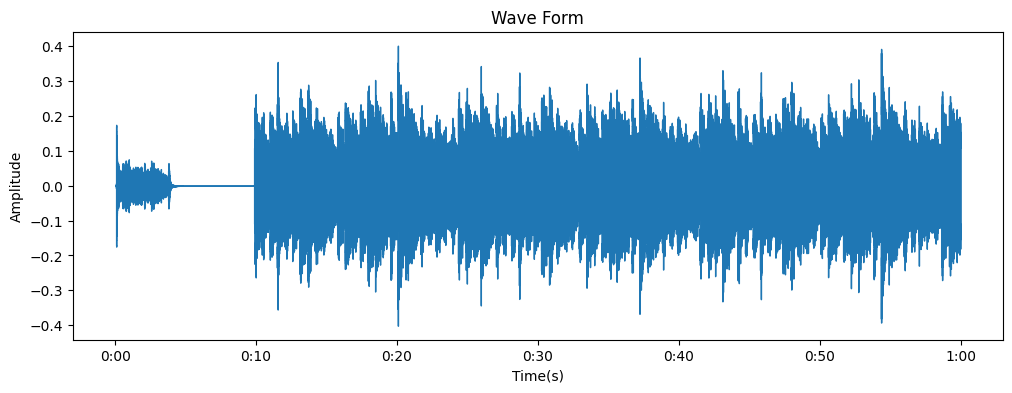

In [66]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(cut_audio, sr = sr)
plt.title ("Wave Form")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

OBTAINING THE SPECTRUM: 
La transformada de fourier nos ayuda a obtener o transformar la señal del dominio temporal al frecuencial. Dentro del dominio frecuencial tenemos una parte en magnitud y otra en fase. (ya que es una onda. 
Nos quedamos con la magnitud de la transofrmada. La magnitud será a la vez una matriz con dominio frecuencial + dominio temporal (en ese segundo de tiempo estaran presentes unas frecuencias concretas)

La frecuencia predominante es: 187.50 Hz


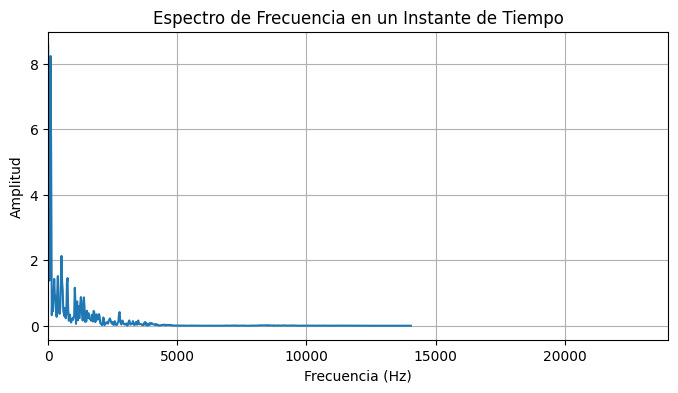

In [ ]:
X = librosa.stft(cut_audio)
X_magnitude = np.abs(X)  # Magnitud del espectrograma
# Obtener número de frecuencias y tiempo
n_frequencies, n_time_frames = X.shape  # X tiene dimensiones (frecuencia, tiempo) --> X es la transformada de fourier
#es una matriz de frecuencias y tiempo -> en cada momento del tiempo del audio hay una distribución diferente de frecuencias

# Crear vector de frecuencias correspondientes a la STFT --> cuantas frecuencias se pueden marcar y visualizar
frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)

dominant_frequency = frequencies[np.argmax(X_magnitude)]

print(f"La frecuencia predominante es: {dominant_frequency:.2f} Hz")
# Graficar espectro de frecuencia en un instante de tiempo
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:600], X_magnitude[:600, 30])  # Tomamos la columna 50 como ejemplo
# Etiquetas
plt.title("Espectro de Frecuencia en un Instante de Tiempo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, sr / 2)  # Mostrar hasta la frecuencia de Nyquist
plt.grid()

# Mostrar gráfica
plt.show()

El tempo de una canción es la velocidad a la que se interpreta la música, medida en pulsos por minuto (BPM, beats per minute). Básicamente, indica cuántos golpes o pulsos hay en un minuto y afecta directamente la sensación rítmica de la canción.

🔹 Ejemplos de tempos comunes:
Lento (40-60 BPM) → Baladas, música clásica relajante
Moderado (80-120 BPM) → Pop, rock suave, reggaetón
Rápido (140-180 BPM) → Electrónica, rock pesado, drum & bass

⏳ Tempo (BPM): [112.5]


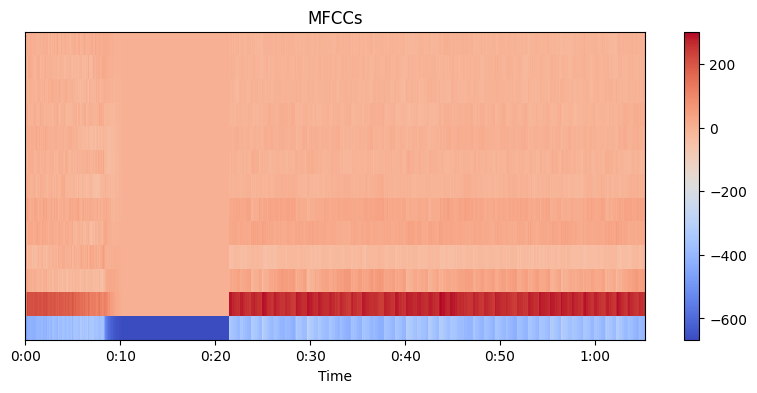

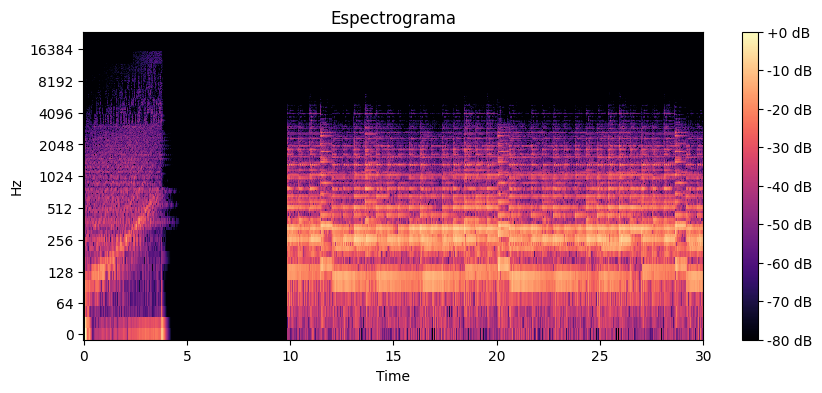

In [ ]:
# Calcular Tempo (BPM)
onset_env = librosa.onset.onset_strength(y=cut_audio, sr=sr)
tempo, _ = librosa.beat.beat_track(y=cut_audio, sr=sr, onset_envelope=onset_env)
print(f"⏳ Tempo (BPM): {tempo}")

# Espectrograma (Representación Visual del Sonido)
stft = np.abs(librosa.stft(cut_audio))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, y_axis="log", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.show()


1. Zero Crossing --> cuantas veces se cruza el eje de las x ( el 0 digamos) TATNO DE POSITIVO A NEGATIVO COMO AL REVES

Bajo ZCR (~0.05 - 0.1) → Sonidos suaves, sostenidos (vocales, notas largas).
Alto ZCR (~0.3 - 0.5) → Sonidos con cambios bruscos (ruido, percusión, consonantes). consonantes fricativas como la s


13


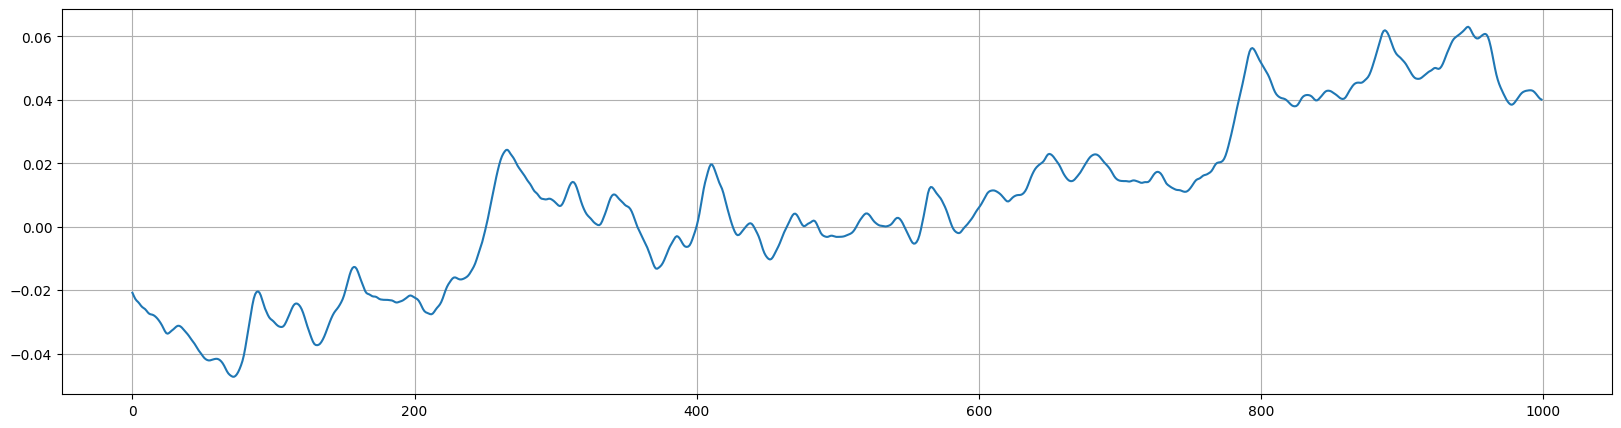

In [ ]:
n0 = 9000
n1 = 10000
zero_crossings = librosa.zero_crossings(cut_audio[n0:n1], pad = False)
print(sum(zero_crossings))
plt.figure(figsize=(20,5))
plt.plot(cut_audio[n0:n1])
plt.grid()

In [ ]:
zcr = librosa.feature.zero_crossing_rate(cut_audio)
zcr_mean = np.mean(zcr)
print(f"Zero Crossing Rate promedio: {zcr_mean:.5f}")

Zero Crossing Rate promedio: 0.01549


2. Spectral Centroid
"centro de gravedad" del espectro de frecuencias de una seña, de audio, que tan "brillante" o "oscura" es una señal. Dependiendo si las frecuencias dominantes están en el fango alto o bajo
Diferenciación de instrumentos 🎻🥁

Sonidos oscuros/cálidos (bajos, chelos) → Bajo Spectral Centroid
Sonidos brillantes/agudos (platillos, guitarra eléctrica) → Alto Spectral Centroid
Análisis de Timbre 🎤🎸

Útil para caracterizar el color del sonido en la música.
Se usa en reconocimiento de instrumentos y clasificación de audio.
Separación entre voz y música 🎶🗣️

La voz suele tener un Spectral Centroid medio, mientras que la percusión y sonidos metálicos tienen valores altos.
Detección de cambios en una canción 🔍

Ayuda a identificar transiciones entre secciones (ejemplo: cambio de un verso a un coro). /n
Bajo (~200-800 Hz) → Sonidos graves (bajo, bombo, chelo).
Medio (~1000-3000 Hz) → Voz humana, guitarra.
Alto (~4000+ Hz) → Platillos, sintetizadores agudos.



Spectral Centroid promedio: 704.20 Hz


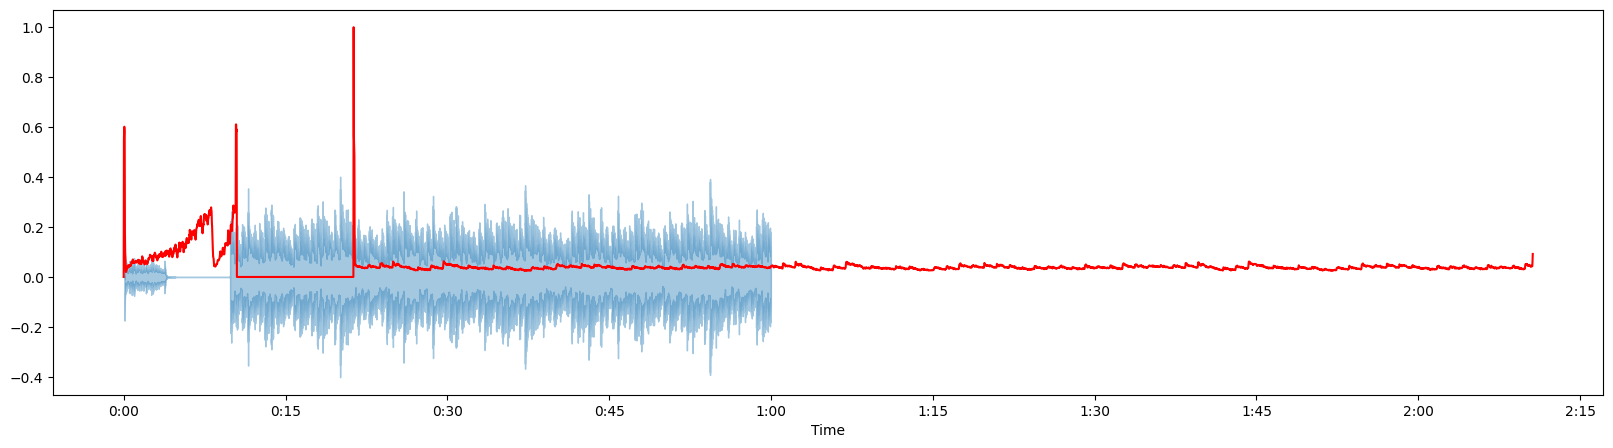

In [72]:
import sklearn.preprocessing


spectral_centroids = librosa.feature.spectral_centroid(y = cut_audio, sr=sr)[0]
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
centroid_mean = np.mean(spectral_centroids)

print(f"Spectral Centroid promedio: {centroid_mean:.2f} Hz")
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(cut_audio, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

📌 ¿Qué es el Spectral Rolloff?
El Spectral Rolloff es la frecuencia por debajo de la cual se encuentra un porcentaje determinado (por defecto, 85%) de la energía total del espectro de una señal de audio. En otras palabras, indica el punto donde la mayor parte del espectro de la señal "se apaga".





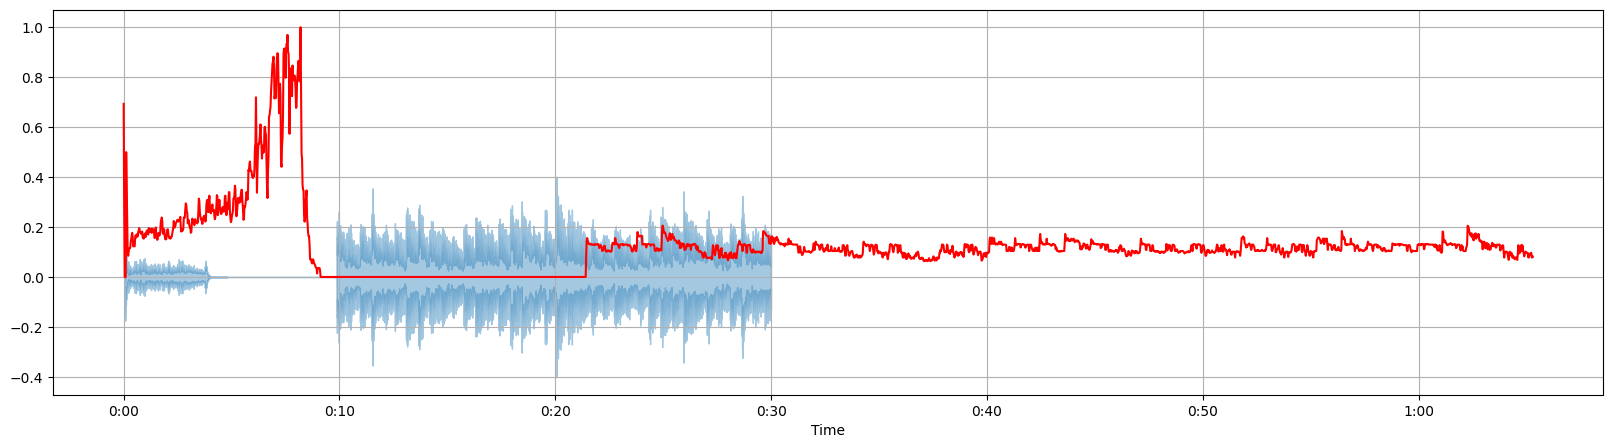

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y = cut_audio+0.01, sr=sr)[0]
librosa.display.waveshow(cut_audio, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

MFCC (Mel-Frequency Cepstral Coefficients)
Representación matemática de las características espectrales de un sonido. Se basa en la percepción humana de las frecuencias, usando la escala MEL que imita cómo el oído humano percibe los sonidos. 
Los valores de los primeros coeficientes contienen información sobre energía y tono global.
Los coeficientes medios y altos contienen información sobre textura y timbre del sonido.
Normalmente, los primeros 13 coeficientes son suficientes para el análisis, aunque en algunos casos se pueden calcular más (20-40).

[[-6.6700299e+02 -6.6700299e+02 -6.6700299e+02 ... -3.5164569e+02
  -3.2039035e+02 -3.0577548e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.7175275e+02
   2.4543411e+02  2.0597321e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1146940e+01
   1.0805790e+01  2.0490231e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1635122e+00
  -4.5402765e+00 -1.2645972e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4323890e+00
  -2.6501374e+00 -4.5314751e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1599857e+01
  -7.5165458e+00 -8.5104828e+00]]


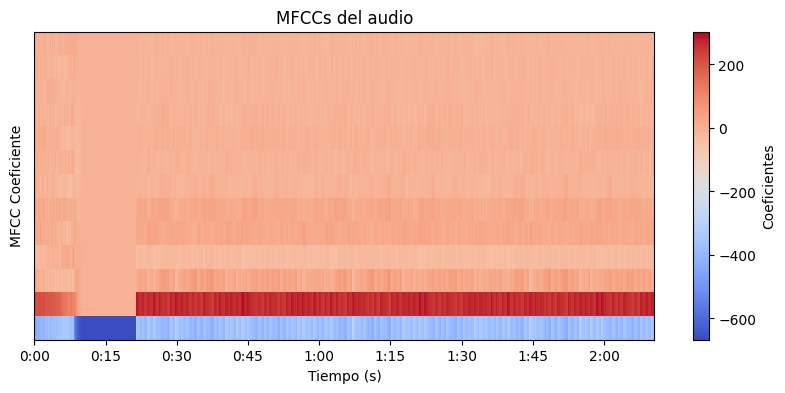

In [74]:
# Extraer MFCCs (útil para IA)
mfccs = librosa.feature.mfcc(y=cut_audio, sr=sr, n_mfcc=13)
print(mfccs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar(label="Coeficientes")
plt.xlabel("Tiempo (s)")
plt.ylabel("MFCC Coeficiente")
plt.title("MFCCs del audio")
plt.show()


Coeficiente	Descripción	Interpretación
MFCC[0]	Energía total del sonido	Volumen general (energía)
MFCC[1]	Pendiente espectral o curvatura	Timbre (variación del tono, grave o agudo)
MFCC[2]	Curvatura espectral (frecuencias altas o bajas)	Timbre (más brillante o grave)
MFCC[3]	Variación espectral rápida	Tensión espectral o cambios rápidos en el sonido
MFCC[4-12]	Características espectrales más detalladas y complejas	Detalles de timbre y frecuencias intermedias

/Users/alexialozano/Documents/GitHub/personal-projects/3d-musical-visualizer/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/Users/alexialozano/Documents/GitHub/personal-projects/3d-musical-visualizer/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


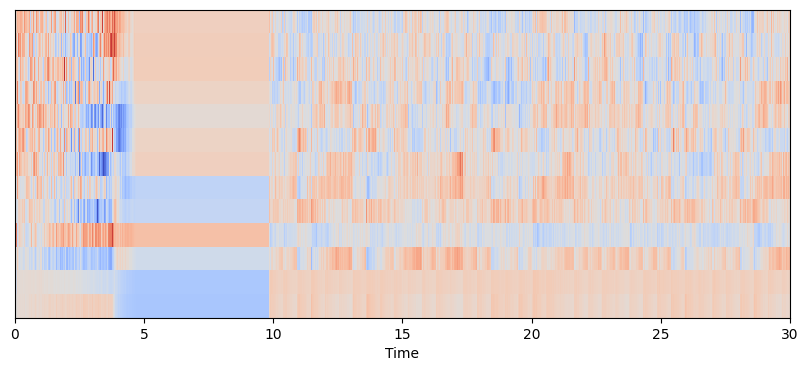

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')